In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

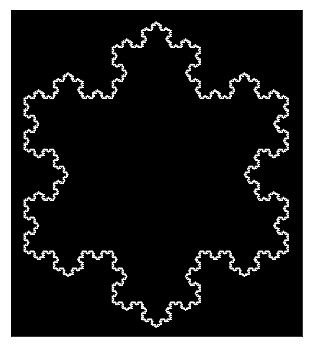

In [130]:
fig = plt.figure()
ax = plt.gca()
ax.set_facecolor("black")
color="white"

lines=[[[0,0],[3,0]]]

def norm(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

def draw_lines(lines,flake=0):
    for l in lines:
        s=l[0]
        e=l[1]
        ax.plot(([s[0]], [e[0]]), ([s[1]], [e[1]]),linestyle='-',color=color,linewidth=1)
        
        if flake:
            rot=4*np.pi/3
            sx1=s[0]*np.cos(rot)-s[1]*np.sin(rot)
            sy1=s[0]*np.sin(rot)+s[1]*np.cos(rot)

            ex1=e[0]*np.cos(rot)-e[1]*np.sin(rot)
            ey1=e[0]*np.sin(rot)+e[1]*np.cos(rot)


            ax.plot(([-sx1], [-ex1]), ([sy1], [ey1]),linestyle='-',color=color,linewidth=1)


            rot=4*np.pi/3   
            sx2=3+s[0]*np.cos(rot)-s[1]*np.sin(rot)
            sy2=s[0]*np.sin(rot)+s[1]*np.cos(rot)

            ex2=3+e[0]*np.cos(rot)-e[1]*np.sin(rot)
            ey2=e[0]*np.sin(rot)+e[1]*np.cos(rot)

            ax.plot(([sx2], [ex2]), ([sy2], [ey2]),linestyle='-',color=color,linewidth=1)        


def get_points(p1,p2):
    x1,y1=[p1[0]],[p1[1]]
    x2,y2=[p2[0]],[p2[1]]
    
    slope=np.arctan2(y2[0]-y1[0],x2[0]-x1[0])
    unit=norm(x1[0],y1[0],x2[0],y2[0])/3
    m1=[x1[0]+unit*np.cos(slope),y1[0]+unit*np.sin(slope)]
    corn=[m1[0]+unit*np.cos(slope+np.pi/3),m1[1]+unit*np.sin(slope+np.pi/3)] 
    m2=[m1[0]+unit*np.cos(slope),m1[1]+unit*np.sin(slope)]

    return([p1,m1,corn,m2,p2])


def generate_lines(lines):
    new_lines=[]
    for l in lines:
        p1=l[0]
        p2=l[1]
        pts=get_points(p1,p2)
        for i in range(len(pts)-1):
            new_lines.append([pts[i],pts[i+1]])
    
    return new_lines
    
def koch(n):
    global lines
    for i in range(n):
        lines=generate_lines(lines)
    draw_lines(lines,1)
        

i=5
koch(i)

fig.set_size_inches(6,6)
#ax.axis('off')
ax.set_xticks([],[])
ax.set_ylim(-2.7,1)
ax.set_yticks([],[])
ax.set_aspect("equal")

fig.savefig("koch_flake"+str(i)+".pdf",bbox_inches='tight',dpi=500)